# Flower Recognition using Pre-trained model

In [1]:
print("START")

START


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib
import os
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import load_img
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Sample images

In [3]:
flowers_dir = '/kaggle/input/cleaned-flower-dataset/Crop_img/'
flower_labels = sorted(os.listdir(flowers_dir))
flower_labels

['Babi',
 'Calimerio',
 'Chrysanthemum',
 'Hydrangeas',
 'Lisianthus',
 'PingPong',
 'Rosy',
 'Tana']

## Data Preprocessing

* Iterate through all images
* Resize image into (299,299,3) since the model expects this input shape
* Convert image into numpy array
* Append features in X and labels in y

/kaggle/input/cleaned-flower-dataset/Crop_img/Babi/babi_12_0.jpg
/kaggle/input/cleaned-flower-dataset/Crop_img/Calimerio/calimero_86_1.jpg
/kaggle/input/cleaned-flower-dataset/Crop_img/Chrysanthemum/chrysanthemum_20_0.jpg
/kaggle/input/cleaned-flower-dataset/Crop_img/Hydrangeas/hydrangeas_498_2.jpg
/kaggle/input/cleaned-flower-dataset/Crop_img/Lisianthus/lisianthus_793_8.jpg
/kaggle/input/cleaned-flower-dataset/Crop_img/PingPong/pingpong_117_2.jpg
/kaggle/input/cleaned-flower-dataset/Crop_img/Rosy/rosy_129_0.jpg
/kaggle/input/cleaned-flower-dataset/Crop_img/Tana/tana_77_0.jpg


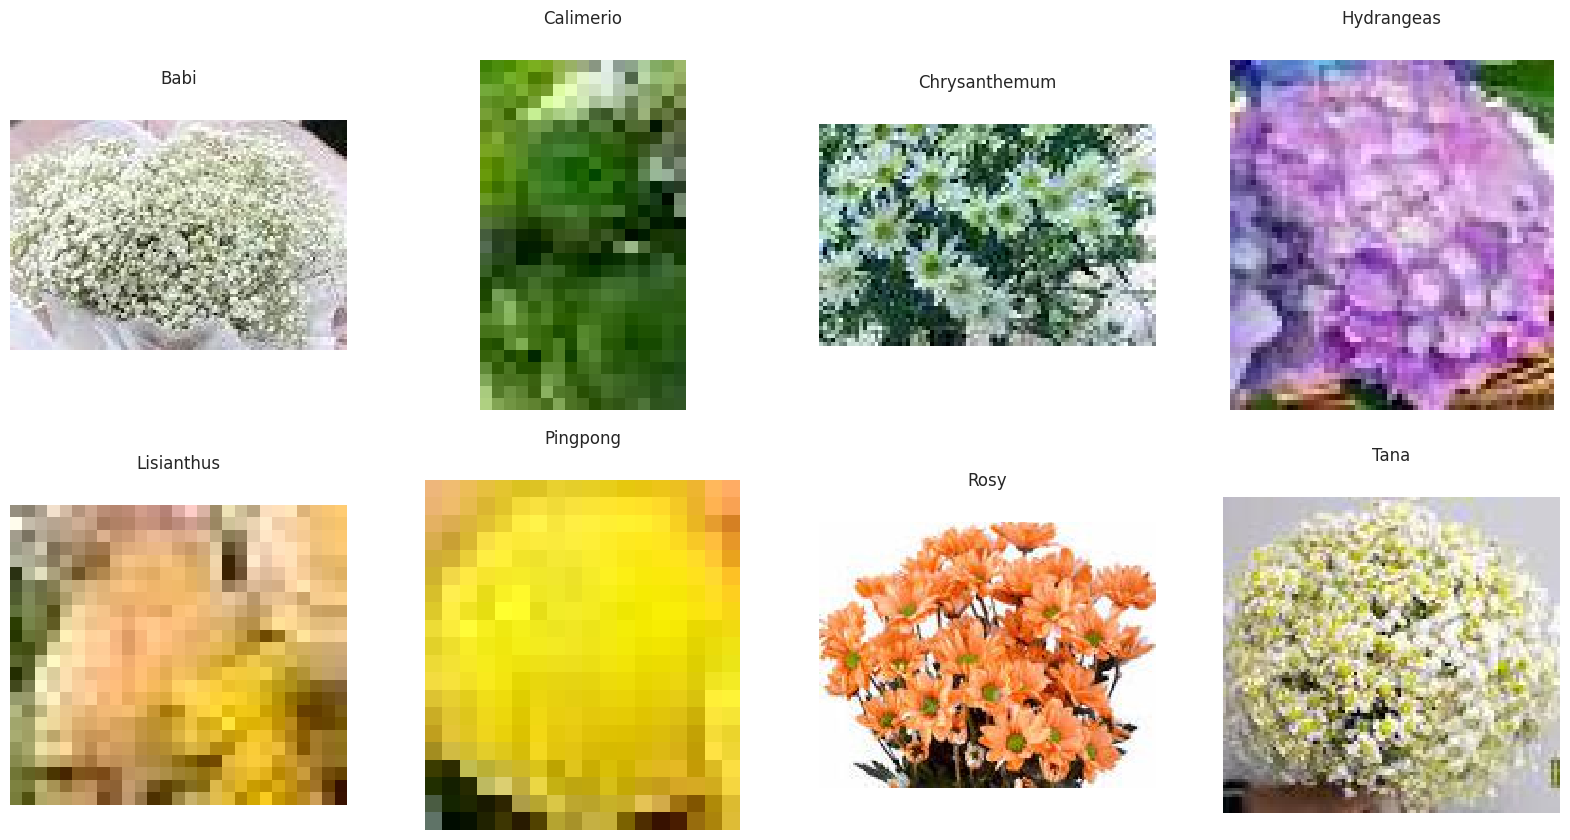

In [4]:
X = []
y = []

img_height = 256
img_width = 256

fig,ax = plt.subplots(2, 4, figsize=(20,10))
ax=ax.flatten()

flowers_dir_path_object = pathlib.Path(flowers_dir)

for label_number,flower in enumerate(flower_labels):
    # get all paths of images inside flower subdirectory
    flower_images_paths = list(flowers_dir_path_object.glob(f'{flower}/*.jpg'))
    ax[label_number].set_title(flower.capitalize())
    ax[label_number].axis('off')
    flower_img = np.array(load_img(flower_images_paths[0].__str__()))
    ax[label_number].matshow(flower_img)
    print(flower_images_paths[0].__str__())
    for image in flower_images_paths:
        # load and resize image
        resized_image = load_img(str(image),target_size=(img_height, img_width))
        # append features in X and labels in y
        X.append(np.array(resized_image))
        y.append(label_number)
        


In [5]:
import os

def scanData():
    data_count = pd.DataFrame(data={"flower": [], "count": []})
    meta_data_df = pd.DataFrame(data={"image_path": [], "flower_type": []})
    folder_path = flowers_dir

    subdirectories = next(os.walk(folder_path))[1]

    print(subdirectories)

    for i in subdirectories:
        sub = next(os.walk(folder_path+"/"+i))
        
        new_meta_data = pd.DataFrame(data={"image_path": [ (sub[0] + "/" + j) for j in sub[2]] , "flower_type": i})
        meta_data_df = pd.concat([meta_data_df, new_meta_data], ignore_index=True)
        
        new_data = pd.DataFrame(data={"flower": i, "count": len(sub[2])}, index=[0])      
        data_count = pd.concat([data_count, new_data], ignore_index=True)
        print(i, len(sub[2]), len([ sub[0] + j for j in sub[2]]))

    return data_count, meta_data_df

img_count, meta_data = scanData()
img_count

['Chrysanthemum', 'Lisianthus', 'Hydrangeas', 'Rosy', 'Babi', 'PingPong', 'Calimerio', 'Tana']
Chrysanthemum 916 916
Lisianthus 3600 3600
Hydrangeas 1099 1099
Rosy 302 302
Babi 889 889
PingPong 1957 1957
Calimerio 1209 1209
Tana 601 601


,flower,count
0,Chrysanthemum,916.0
1,Lisianthus,3600.0
2,Hydrangeas,1099.0
3,Rosy,302.0
4,Babi,889.0
5,PingPong,1957.0
6,Calimerio,1209.0
7,Tana,601.0


<AxesSubplot: xlabel='flower', ylabel='count'>

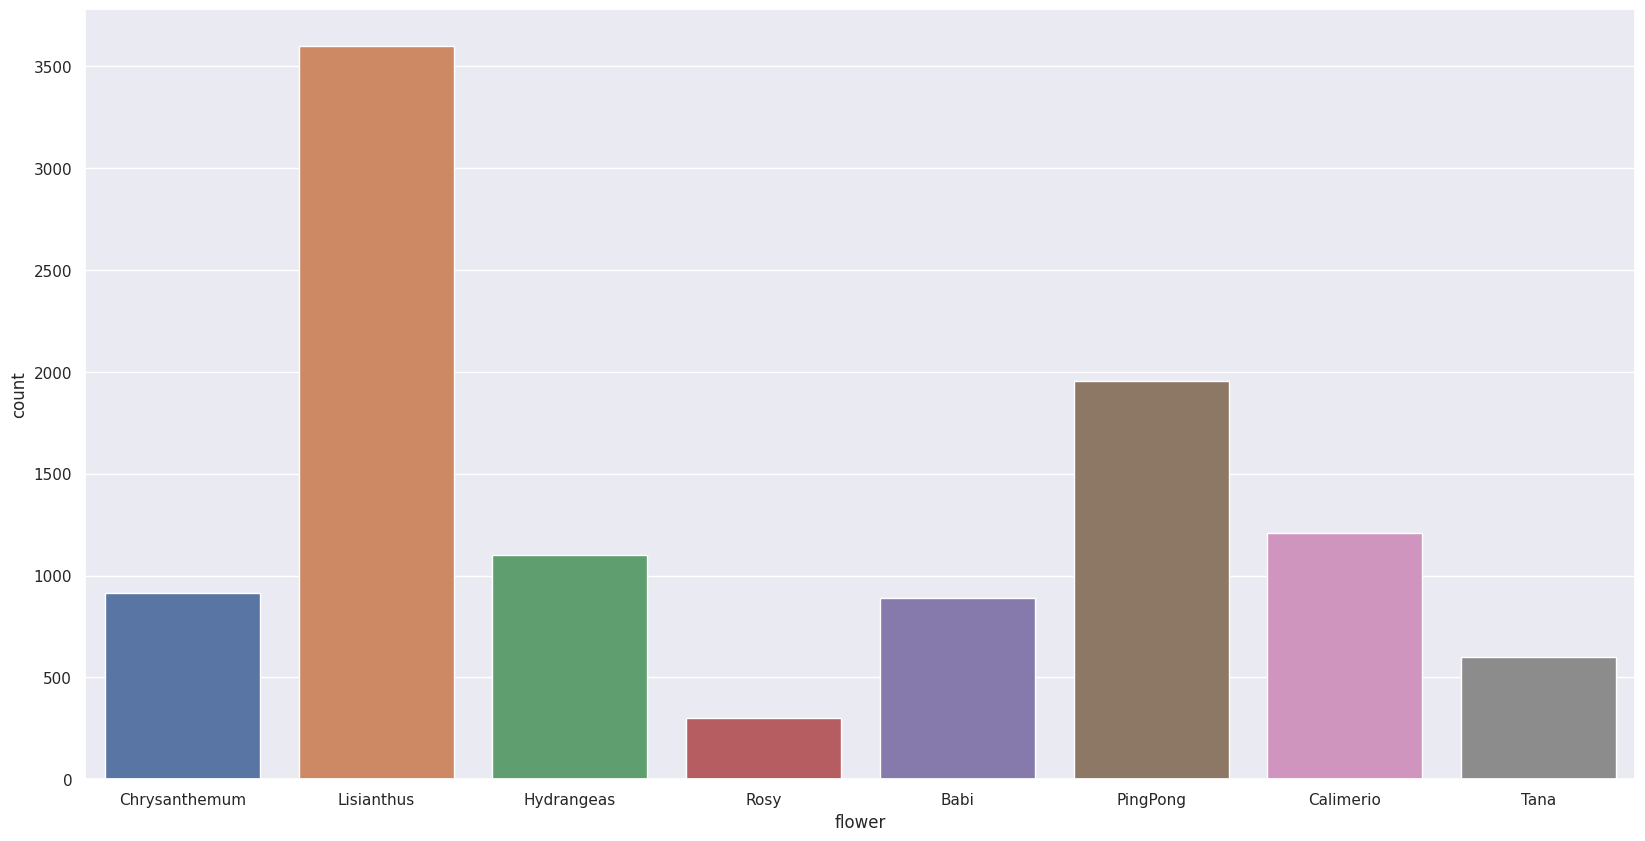

In [6]:
plt.figure(figsize=(20,10))
sns.barplot(data=img_count, x='flower', y='count')

In [7]:
X = np.array(X)
y = np.array(y)

print('X shape: {}'.format(X.shape))
print('y shape: {}'.format(y.shape))

X shape: (10573, 256, 256, 3)
y shape: (10573,)


## Model Building

* Train test split
* Fine-tuning pre-trained model
* Model evaluation

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

print('X train shape: {}'.format(X_train.shape))
print('X test shape: {}'.format(X_test.shape))

X train shape: (7929, 256, 256, 3)
X test shape: (2644, 256, 256, 3)


In [9]:


model = tf.keras.Sequential([
    
    
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    hub.KerasLayer("https://tfhub.dev/google/imagenet/inception_v3/feature_vector/5",trainable=True),
    
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same', 
#                            input_shape=(img_height, img_width)),
#     tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     #VGG block 2
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     #VGG block 3
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#         #VGG block 3
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#         #VGG block 3
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])
sgd_opt = tf.keras.optimizers.SGD(
    learning_rate=0.00001,
    momentum=0.9,
)
model.compile( optimizer=sgd_opt,loss='sparse_categorical_crossentropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 keras_layer (KerasLayer)    (None, 2048)              21802784  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
Total params: 22,069,712
Trainable params: 22,035,280
No

In [10]:
history = model.fit(X_train,y_train,batch_size=64,validation_split=0.2,epochs=350)

Epoch 1/350
100/100 [==============================] - 68s 408ms/step - loss: 2.8555 - accuracy: 0.1794 - val_loss: 2.8299 - val_accuracy: 0.1683
Epoch 2/350
100/100 [==============================] - 36s 356ms/step - loss: 2.7668 - accuracy: 0.2749 - val_loss: 2.7465 - val_accuracy: 0.3020
Epoch 3/350
100/100 [==============================] - 35s 355ms/step - loss: 2.6864 - accuracy: 0.3292 - val_loss: 2.6650 - val_accuracy: 0.3304
Epoch 4/350
100/100 [==============================] - 35s 354ms/step - loss: 2.6055 - accuracy: 0.3511 - val_loss: 2.5893 - val_accuracy: 0.3462
Epoch 5/350
100/100 [==============================] - 35s 355ms/step - loss: 2.5380 - accuracy: 0.3539 - val_loss: 2.5248 - val_accuracy: 0.3499
Epoch 6/350
100/100 [==============================] - 35s 355ms/step - loss: 2.4760 - accuracy: 0.3629 - val_loss: 2.4721 - val_accuracy: 0.3506
Epoch 7/350
100/100 [==============================] - 36s 356ms/step - loss: 2.4214 - accuracy: 0.3623 - val_loss: 2.4275 -

In [11]:
model.evaluate(X_test,y_test)

83/83 [==============================] - 6s 63ms/step - loss: 0.7909 - accuracy: 0.8154


[0.7908962965011597, 0.8154311776161194]

In [12]:
model.metrics_names

['loss', 'accuracy']

In [13]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')
    
    plt.axhline(y = max(train_metric), color = 'r', linestyle = '-')
    plt.axhline(y = max(val_metric), color = 'b', linestyle = '-')

    plt.show()

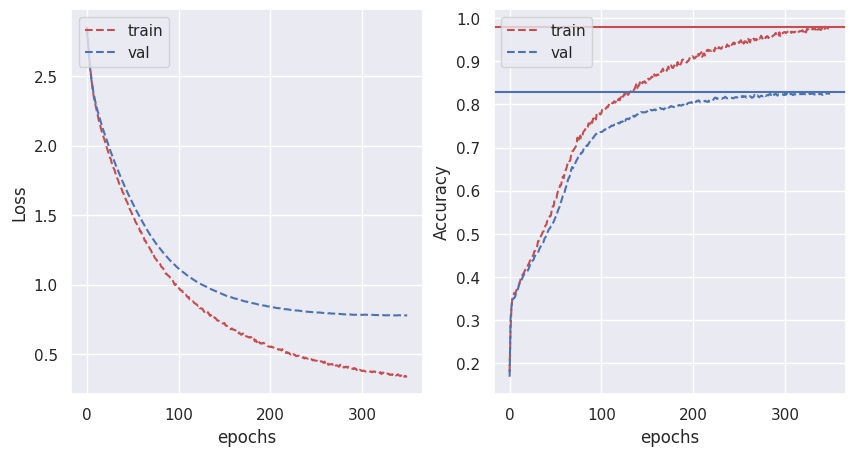

In [14]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['accuracy'], history.history['val_accuracy'], 
                    metric_name='Accuracy')

83/83 [==============================] - 5s 53ms/step


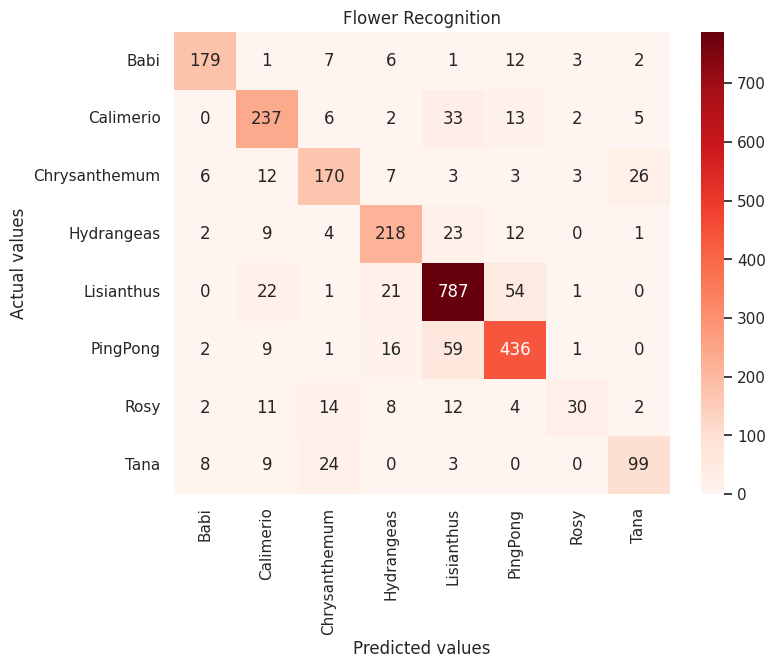

In [15]:
predictions = model.predict(X_test)
max_predictions = [np.argmax(value) for value in predictions]
max_predictions[:5]
confusion_matrix_result = confusion_matrix(y_test,max_predictions)

labels = flower_labels
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result,annot=True,cmap='Reds',fmt='.0f',xticklabels=labels,yticklabels=labels)
plt.title('Flower Recognition')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [16]:
classification_report_result = classification_report(y_test,max_predictions)
print(classification_report_result)

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       211
           1       0.76      0.80      0.78       298
           2       0.75      0.74      0.74       230
           3       0.78      0.81      0.80       269
           4       0.85      0.89      0.87       886
           5       0.82      0.83      0.82       524
           6       0.75      0.36      0.49        83
           7       0.73      0.69      0.71       143

    accuracy                           0.82      2644
   macro avg       0.79      0.75      0.76      2644
weighted avg       0.81      0.82      0.81      2644



## Saving the model

In [17]:
model.save('/kaggle/working/flower_recognition_model_SGD_6_classes__250_epochs.h5')